>* Sentiment analysis can be a useful way to analyze the expressed sentiment (i.e., positive, negative, or neutral) in a given text.
>* Social media is a place where people exhibit their emotions and sentiments so it is a good place to analyze the sentiment of the people.

>* We will use the Parler data. Parler is an alternative social media platform to Twitter. It is known for its conservative user base and its lax moderation policies. 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('subset-2021-01-11-voter_fraud.csv')

In [3]:
data.columns

Index(['article', 'body', 'bodywithurls', 'comments', 'createdAt',
       'createdAtformatted', 'creator', 'datatype', 'depth', 'depthRaw',
       ...
       'urls.15.createdAt', 'urls.15.domain', 'urls.15.id', 'urls.15.long',
       'urls.15.metadata.length', 'urls.15.metadata.mimeType',
       'urls.15.metadata.site', 'urls.15.modified', 'urls.15.short',
       'urls.15.state'],
      dtype='object', length=420)

In [4]:
content=data[['body','username']]

In [5]:
content

,body,username
0,Folks may be our last posts. Pogilosi just ask...,Terryb158
1,Oh notre they want to investigate something. L...,AlanBond7
2,White trash pieces of shit who are going to be...,Tifdog11
3,He has never lived in a totalitarian country; ...,AlexaImmigrant
4,White trash pieces of shit who are going to be...,Tifdog11
...,...,...
86,GRAHAM\nHe begged us for money on Hannity and ...,Millsfarms
87,Neither is election fraud.,xfitnesscoach
88,"Investigation of fraudulent voting practices, ...",Bobbfishen
89,Why did Nunes recuse himself on the election f...,BarryOKenyan


>* The first sentiment analysis package in Python is VADER (Valence Aware Dictionary and sEntiment Reasoner). VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

In [7]:
content.iloc[0]['body']

'Folks may be our last posts. Pogilosi just asked for a Military Coup. She shoukd be fired and jailed for this. Never forget. The Govt is to blame for the DC breach. We all saw the videos and we all know the truth. Trump did not incite violence he was supportinh our rights. Thos that committed the election fraud and the breach are the murderers. The Govt failed for 4 years to hear our voice. They also failed to have 1 court hear the mass evidence on fraud. Italy did it, we all know the truth. You cant hide your lies. They have been exposed. \n\nIF YOU IMPEACH TRUMP YOU ARE INCITING VIOLENCE AND JUSTUCE WILL PREVAIL. THE TRUTH CAN ONLY BE HIDDEN FOR SO LONG.'

In [8]:
sia().polarity_scores(content.iloc[0]['body'])

{'neg': 0.215, 'neu': 0.667, 'pos': 0.118, 'compound': -0.9601}

>* What is inside the `neg`, `neu`, `pos`, and `compound` are the sentiment scores. The `compound` score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.
>* For more information, you can check the [VADER github repository](https://github.com/cjhutto/vaderSentiment)

>* Often times you will have a dataset of spreadsheets. In this case, you want to iterate over the rows of the spreadsheet and apply the sentiment analysis to each row.

In [9]:
vader_neg=[] #Inside of this list, there will be a list of negative scores corresponding
vader_neu=[] #to each row in the content. So it is a nested list.
vader_pos=[]
vader_compound=[]
for idx, val in content.iterrows():
    scores=sia().polarity_scores(val['body'])
    vader_neg.append(scores['neg'])
    vader_neu.append(scores['neu'])
    vader_pos.append(scores['pos'])
    vader_compound.append(scores['compound'])

In [10]:
content['vader_neg']=vader_neg
content['vader_neu']=vader_neu
content['vader_pos']=vader_pos
content['vader_compound']=vader_compound

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/1985569870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['vader_neg']=vader_neg
/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/1985569870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['vader_neu']=vader_neu
/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/1985569870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [11]:
content.head(5)
#The compound score ranges from -1 to 1. -1 is most negative, 1 is most positive.

,body,username,vader_neg,vader_neu,vader_pos,vader_compound
0,Folks may be our last posts. Pogilosi just ask...,Terryb158,0.215,0.667,0.118,-0.9601
1,Oh notre they want to investigate something. L...,AlanBond7,0.301,0.554,0.145,-0.7096
2,White trash pieces of shit who are going to be...,Tifdog11,0.312,0.510,0.178,-0.9689
3,He has never lived in a totalitarian country; ...,AlexaImmigrant,0.116,0.828,0.055,-0.7540
4,White trash pieces of shit who are going to be...,Tifdog11,0.312,0.510,0.178,-0.9689


>* To get a broader sense of the distribution of `compound` scores, let's plot scatter plot of the `compound` scores.

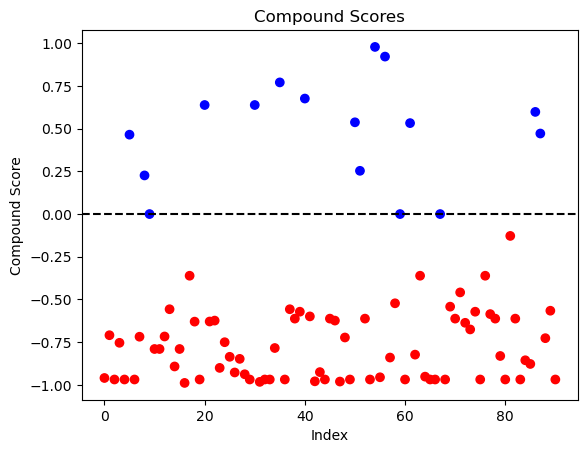

In [12]:
import matplotlib.pyplot as plt
plt.scatter(content.index, content['vader_compound'], 
            c=['red' if score < 0 else 'blue' for score in content['vader_compound']])
plt.xlabel('Index')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Compound Score')
plt.title('Compound Scores')
plt.show()

>* We can see the most of contents are negative as we can see more red dots below 0 in the scatter plot.

>* Let's sort the dataframe by the `compound` score and see the most positive and most negative comments.

In [13]:
content[['body', 'username', 'vader_compound']].sort_values(by='vader_compound',ascending=False)[0:3]
#The most positive posts

,body,username,vader_compound
54,@sidneypowell @erictrump\n@laraleatrump @linwo...,Lovewell100,0.9789
56,"If they were not afraid of Trump, they would j...",Lorilynn2,0.9223
35,@sidneypowell @erictrump\n@laraleatrump @linwo...,Lovewell100,0.7711


In [14]:
from pprint import pprint
pprint(content['body'].iloc[54]) #0.9789

('@sidneypowell @erictrump\n'
 '@laraleatrump @linwood\n'
 '@devinnunes @drjeromecorsi\n'
 '@rogerstone @alexjones @ivankatrump\n'
 '\n'
 'IMPORTANT MUST READ!\n'
 '\n'
 'ACCORDING TO FEDERAL LAW AND OUR U.S. CONSTITUTION â€“\n'
 'TRUMP IS THE CLEAR WINNER DUE TO CLEAR ELECTION FRAUD\n'
 '\n'
 '"STAND WITH PRESIDENT TRUMP ALL THE WAY"\n'
 '\n'
 'by Dr. Laurie Roth, Â©2021\n'
 '\n'
 '"(Jan. 7, 2021) â€” The law and Supreme Court precedents are blatantly '
 'direct about a Presidential election with fraud in it. â€œState of the '
 'Nationâ€\x9d made a strong and clear case for Trump simply winning by '
 'default. Read it, continue praying and believe the truth. Stand with Trump! '
 'Donâ€™t run into the deep-state swamp with Mike Pence, Mitch McConnell and '
 'other traitors.\n'
 '\n'
 'Our Congress certified the election illegally and unconstitutionally. There '
 'is nothing ambiguous about what the federal law, Supreme Court and '
 'Constitution says."\n'
 '\n'
 'MUST READ!\n'
 '\n'
 '

In [15]:
pprint(content['body'].iloc[56]) #0.9223

('If they were not afraid of Trump, they would just be sitting back waiting, '
 'laughing and gloating over their achievements of winning an election so '
 'clearly rigged in their favor. They are like wolves on a chase. Worried '
 'their secrets will be exposed at ant moment, and I am PRAYING they will be.')


In [16]:
pprint(content['body'].iloc[35]) #0.7711

('@sidneypowell @erictrump\n'
 '@laraleatrump @linwood\n'
 '@drjeromecorsi @seanhannity @ivankatrump @rogerstone @alexjones\n'
 '\n'
 'OUTSTANDING MUST READ!\n'
 '\n'
 'ACCORDING TO FEDERAL LAW AND OUR U.S. CONSTITUTION â€“\n'
 'TRUMP IS THE CLEAR WINNER DUE TO CLEAR ELECTION FRAUD\n'
 '\n'
 '"STAND WITH PRESIDENT TRUMP ALL THE WAY"\n'
 '\n'
 'by Dr. Laurie Roth, Â©2021\n'
 '\n'
 'Con\'t: "(Jan. 7, 2021) â€” What we also have seen with all the election '
 'fraud-proof is many judges, most politicians and all of the mainstream '
 'media, Fox News and even Newsmax on occasion, havenâ€™t stood with President '
 'Trump & the Constitution. How many times from Fox and Newsmax hosts did we '
 'hear â€œno proofâ€\x9d or â€œlack of proofâ€\x9d while calling on the '
 'cowardly essence of Mitch McConnell and Mitt Romney? We arenâ€™t as stupid '
 'as they think we are. The proof is vividly out there and documented. It is '
 'just vividly ignored."\n'
 '\n'
 'Continue Reading:\n'
 'w w w dot thepo

In [17]:
content['body'].iloc[54]==content['body'].iloc[35]
#54 and 35 share the same part of the text but resulted in different compound scores.

False

In [18]:
content.sort_values(by='vader_compound',ascending=True)[0:3]
#The most negative posts

,body,username,vader_neg,vader_neu,vader_pos,vader_compound
16,Those sleazbags dems are trying to pull off a ...,Dbgroup00,0.377,0.599,0.025,-0.9890
31,"tick tock MAGA bigots, white supremacists, dom...",ArtDogg,0.250,0.686,0.064,-0.9829
47,"Couldn't even watch all of this. WTF? Well, le...",Jillwilsey62,0.289,0.644,0.067,-0.9810


In [19]:
pprint(content['body'].iloc[16]) #-0.9890

('Those sleazbags dems are trying to pull off a coup amd are still scared '
 'President Trump may pull exec order \n'
 'to stop this attack on our democracy \n'
 'How disappointing and embarrassing - THE WHOLE WORLD WATCHED THIS EVIL '
 'RIGGED ELECTION COUP GO DOWN RIGHT IN FRONT OF OUR EYES AND OUR \n'
 'AND OUR CORRUPT AMD COWARDLY GOVT FBI DOJ AND ALL DEVIEVED AND BETRAYED '
 'US. \n'
 'WEâ€™re all praying Pres Trump can stop this evil coup')


In [20]:
pprint(content['body'].iloc[31]) #-0.9829

('tick tock MAGA bigots, white supremacists, domestic terrorist insurgents and '
 'anti-amercan seditionist trump monkeys ... \n'
 '\n'
 'tick tick tick ....\n'
 '\n'
 'Parler: Everything you need to know \n'
 'about the banned conservative social media platform\n'
 '\n'
 'Parler is rife with misinformation, including a stream of baseless '
 'allegations of voter fraud. The platform has become a hub of Trump-backed '
 'conspiracy theories casting doubt on the election of President-elect Biden.\n'
 'Accounts with swastikas as their profile pictures and disgusting racist '
 'posts are not hard to come by on Parler. Members of the Proud Boys, '
 'adherents of conspiracy theory QAnon, anti-government extremists and white '
 'supremacists all openly promote their views on Parler, according to an ADL '
 'report.\n'
 '"Holocaust denial, antisemitism, racism and other forms of bigotry are also '
 'easy to find,"')


In [21]:
pprint(content['body'].iloc[47]) #-0.9810

("Couldn't even watch all of this. WTF? Well, let's see ... his past is not "
 "all that great, if I recall ... Proud Boys like nazi's? What the hell is he "
 'even talking about? Our democracy being shattered? That came from the '
 'outright blatant election fraud. I would think since he came here from '
 'another country, he, of all people, would be outraged at the blatant '
 'election fraud that just occurred. Traitor. Strip his U.S. status and send '
 'his sorry ass back to where he came from. Traitor.')


>* The next package we will cover is TextBlob. TextBlob is a Python library for processing textual data. One of features that TextBlob has is a built-in sentiment analyzer. The sentiment analyzer in TextBlob returns two properties: polarity and subjectivity. Polarity is a float value within the range [-1.0, 1.0] where -1.0 is very negative and 1.0 is very positive. Subjectivity is a float value within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [22]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
#conda install -c conda-forge textblob

>* TextBlob sentiment analysis can be customized by using different classifiers. For instance, even though the default classifier is PatternAnalyzer, you can use NaiveBayesAnalyzer instead.

In [23]:
TextBlob(content['body'].iloc[0]).sentiment
#using a default PatternAnalyzer

Sentiment(polarity=-0.18809523809523812, subjectivity=0.35714285714285715)

In [24]:
TextBlob(content['body'].iloc[0]).sentiment.polarity
#ranges -1 to 1. -1 is most negative, 1 is most positive.

-0.18809523809523812

In [25]:
TextBlob(content['body'].iloc[0]).sentiment.subjectivity
#ranges 0 to 1. 0 is most objective, 1 is most subjective.

0.35714285714285715

In [26]:
TextBlob(content['body'].iloc[0], analyzer=NaiveBayesAnalyzer()).sentiment
#using a NaiveBayesAnalyzer

Sentiment(classification='neg', p_pos=0.39306661520895214, p_neg=0.6069333847910466)

In [27]:
TextBlob(content['body'].iloc[0], analyzer=NaiveBayesAnalyzer()).sentiment.classification

'neg'

In [28]:
TextBlob(content['body'].iloc[0], analyzer=NaiveBayesAnalyzer()).sentiment.p_pos

0.39306661520895214

In [29]:
TextBlob(content['body'].iloc[0], analyzer=NaiveBayesAnalyzer()).sentiment.p_neg

0.6069333847910466

>* Given that most data is stored in spreadsheets, we will iterate over the rows of the spreadsheet and apply the sentiment analysis to each row.

In [30]:
sentiment=[]
subjectivity=[]
for idx, val in content.iterrows():
    sentiment.append(TextBlob(val['body']).sentiment.polarity)
    subjectivity.append(TextBlob(val['body']).sentiment.subjectivity)

In [31]:
content['textblob_sentiment']=sentiment
content['textblob_subjectivity']=subjectivity

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/3094424689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['textblob_sentiment']=sentiment
/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/3094424689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['textblob_subjectivity']=subjectivity


In [32]:
textblob_class=[]
textblob_pos=[]
textblob_neg=[]
for idx, val in content.iterrows():
    textblob_class.append(TextBlob(val['body'], analyzer=NaiveBayesAnalyzer()).sentiment.classification)
    textblob_pos.append(TextBlob(val['body'], analyzer=NaiveBayesAnalyzer()).sentiment.p_pos)
    textblob_neg.append(TextBlob(val['body'], analyzer=NaiveBayesAnalyzer()).sentiment.p_neg)

In [33]:
content['textblob_class']=textblob_class
content['textblob_pos']=textblob_pos
content['textblob_neg']=textblob_neg

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/2736474915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['textblob_class']=textblob_class
/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/2736474915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['textblob_pos']=textblob_pos
/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/2736474915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

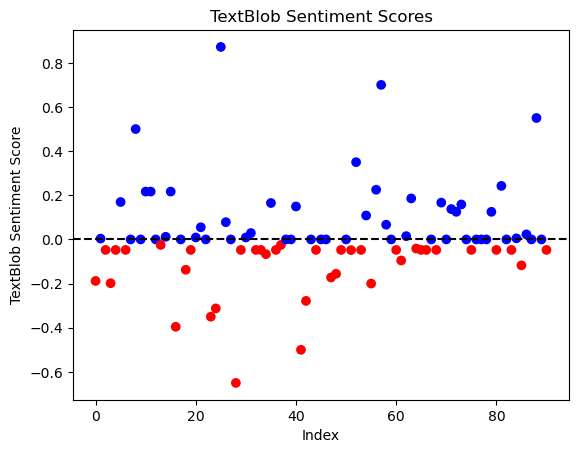

In [34]:
#visualizing the sentiment scores with PatternAnalyzer
plt.scatter(content.index, content['textblob_sentiment'],
            c=['red' if score < 0 else 'blue' for score in content['textblob_sentiment']])
plt.xlabel('Index')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('TextBlob Sentiment Score')
plt.title('TextBlob Sentiment Scores')
plt.show()

>* You can also visualize the positive scores and negative scores with NaiveBayesAnalyzer.

In [35]:
content['textblob_naive']=content['textblob_pos']-content['textblob_neg']
content['textblob_naive']
#The difference between the positive and negative probabilities
#Negative values indicate that the text is negative
#Positive values indicate that the text is positive

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/111561893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['textblob_naive']=content['textblob_pos']-content['textblob_neg']


0    -0.213867
1     0.211247
2     0.563019
3     0.861807
4     0.563019
        ...   
86    0.504309
87    0.238213
88   -0.217036
89    0.527363
90    0.563019
Name: textblob_naive, Length: 91, dtype: float64

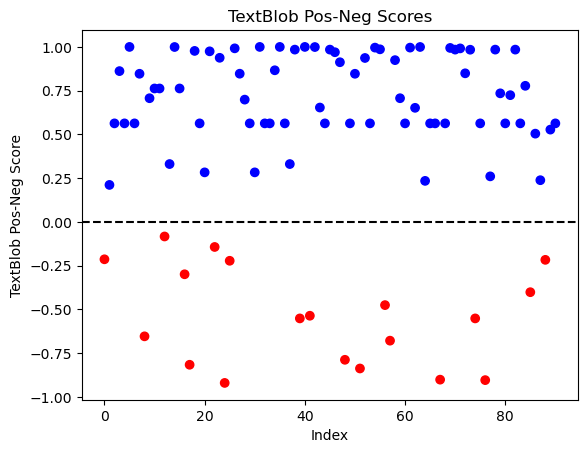

In [36]:
plt.scatter(content.index, content['textblob_pos']-content['textblob_neg'],
            c=['red' if score < 0 else 'blue' for score 
               in content['textblob_pos']-content['textblob_neg']])
plt.xlabel('Index')
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('TextBlob Pos-Neg Score')
plt.title('TextBlob Pos-Neg Scores')
plt.show()

>* Q. What do you think about the results between PatternAnalyzer and NaiveBayesAnalyzer? What is the difference?

> * This difference tells you about the core idea of research. `The law of hammer` or `the law of the instrument` is a cognitive bias that involves an over-reliance on a familiar tool. As Abraham Maslow said in 1966, "I suppose it is tempting, if the only tool you have is a hammer, to treat everything as if it were a nail." This is why we have to compare the results of different tools to get a better understanding of the data.

>* Let's compare what contents have been classified as the most positive and most negative comments by PatternAnalyzer and NaiveBayesAnalyzer.

>* First let's print out examples of the most positive and most negative comments by PatternAnalyzer.

In [37]:
content.sort_values(by='textblob_sentiment',ascending=False)[0:3][['body', 'username', 'textblob_sentiment']]
#positive posts

,body,username,textblob_sentiment
25,Why hadnâ€™t Trump set up special counsel inve...,LAGA57,0.871931
57,"@Irishmick66 Guess Iâ€™m not to bright, donâ€™...",ConsertiveSon,0.700000
88,"Investigation of fraudulent voting practices, ...",Bobbfishen,0.550000


In [38]:
pprint(content['body'].iloc[25]) #0.871931

('Why hadnâ€™t Trump set up special counsel invest on election fraud and into '
 'Biden Obama money laundering with hunter. WE arenâ€™t going away, we are '
 'awakened!!!! This is WAR')


In [39]:
pprint(content['body'].iloc[57]) #0.700000

('@Irishmick66 Guess Iâ€™m not to bright, donâ€™t know about fixing link. \n'
 '\n'
 'Tried sending Biden voter fraud. Will try again. \n'
 'Keeps saying forbidden b')


In [40]:
pprint(content['body'].iloc[88]) #0.550000

('Investigation of fraudulent voting practices, and rigged voting machines. Is '
 'your constitutional duty to insure Citizens a free and fair election. Not '
 "investigating is where the crime is. We still don'tknow if the election was "
 'rigged.')


In [41]:
content.sort_values(by='textblob_sentiment',ascending=True)[0:3][['body', 'username', 'textblob_sentiment']]
#negative posts

,body,username,textblob_sentiment
28,why bother if they get away with this election...,Jeanetheys,-0.650000
41,Unfortunately they don't need us anymore. Elec...,ChelyB,-0.500000
16,Those sleazbags dems are trying to pull off a ...,Dbgroup00,-0.395692


In [42]:
pprint(content['body'].iloc[28]) #-0.650000

('why bother if they get away with this election fraud then they will have no '
 'problem again fooking scum evil rats')


In [43]:
pprint(content['body'].iloc[41]) #-0.500000

"Unfortunately they don't need us anymore. Elections are rigged."


In [44]:
pprint(content['body'].iloc[16]) #-0.395692

('Those sleazbags dems are trying to pull off a coup amd are still scared '
 'President Trump may pull exec order \n'
 'to stop this attack on our democracy \n'
 'How disappointing and embarrassing - THE WHOLE WORLD WATCHED THIS EVIL '
 'RIGGED ELECTION COUP GO DOWN RIGHT IN FRONT OF OUR EYES AND OUR \n'
 'AND OUR CORRUPT AMD COWARDLY GOVT FBI DOJ AND ALL DEVIEVED AND BETRAYED '
 'US. \n'
 'WEâ€™re all praying Pres Trump can stop this evil coup')


>* Next, let's print out examples of the most positive and most negative comments by NaiveBayesAnalyzer.

In [45]:
content.sort_values(by='textblob_naive',ascending=False)[0:3][['body', 'username', 'textblob_naive']]
#positive posts

,body,username,textblob_naive
40,@erictrump @laraleatrump @sidneypowell @linwoo...,Lovewell100,1.0
31,"tick tock MAGA bigots, white supremacists, dom...",ArtDogg,1.0
35,@sidneypowell @erictrump\n@laraleatrump @linwo...,Lovewell100,1.0


In [46]:
pprint(content.iloc[40]['body']) #1.0

('@erictrump @laraleatrump @sidneypowell @linwood\n'
 '@rogerstone\n'
 '\n'
 'MUST READ!\n'
 '\n'
 'ACCORDING TO FEDERAL LAW AND OUR U.S. CONSTITUTION â€“\n'
 'TRUMP IS THE CLEAR WINNER DUE TO CLEAR ELECTION FRAUD\n'
 '\n'
 '"STAND WITH PRESIDENT TRUMP ALL THE WAY"\n'
 '\n'
 'by Dr. Laurie Roth, Â©2021\n'
 '\n'
 '(Jan 7, 2021) â€” No matter how rough the course may be for a while, Trump '
 'has constitutionally won & Trump & real Americans must stand & fight. Trump '
 'must never concede an election that he & America boldly won. Trump must '
 'stand with the military & start making needed arrests for treason & election '
 'fraud no matter how radical that sounds. Crimes & felonies have been '
 'committed & it wasnâ€™t by Trump.\n'
 '\n'
 'The MSM,RINOs,governors,AGs, judges & many in the House & Senate with Pence '
 'must answer for supporting & standing with bold election crimes instead of '
 'the U.S. laws, the U.S. Constitution & the USA people.\n'
 '\n'
 'w w w dot thepostemail dot

In [47]:
pprint(content.iloc[31]['body']) #1.0

('tick tock MAGA bigots, white supremacists, domestic terrorist insurgents and '
 'anti-amercan seditionist trump monkeys ... \n'
 '\n'
 'tick tick tick ....\n'
 '\n'
 'Parler: Everything you need to know \n'
 'about the banned conservative social media platform\n'
 '\n'
 'Parler is rife with misinformation, including a stream of baseless '
 'allegations of voter fraud. The platform has become a hub of Trump-backed '
 'conspiracy theories casting doubt on the election of President-elect Biden.\n'
 'Accounts with swastikas as their profile pictures and disgusting racist '
 'posts are not hard to come by on Parler. Members of the Proud Boys, '
 'adherents of conspiracy theory QAnon, anti-government extremists and white '
 'supremacists all openly promote their views on Parler, according to an ADL '
 'report.\n'
 '"Holocaust denial, antisemitism, racism and other forms of bigotry are also '
 'easy to find,"')


In [48]:
pprint(content.iloc[35]['body']) #1.0

('@sidneypowell @erictrump\n'
 '@laraleatrump @linwood\n'
 '@drjeromecorsi @seanhannity @ivankatrump @rogerstone @alexjones\n'
 '\n'
 'OUTSTANDING MUST READ!\n'
 '\n'
 'ACCORDING TO FEDERAL LAW AND OUR U.S. CONSTITUTION â€“\n'
 'TRUMP IS THE CLEAR WINNER DUE TO CLEAR ELECTION FRAUD\n'
 '\n'
 '"STAND WITH PRESIDENT TRUMP ALL THE WAY"\n'
 '\n'
 'by Dr. Laurie Roth, Â©2021\n'
 '\n'
 'Con\'t: "(Jan. 7, 2021) â€” What we also have seen with all the election '
 'fraud-proof is many judges, most politicians and all of the mainstream '
 'media, Fox News and even Newsmax on occasion, havenâ€™t stood with President '
 'Trump & the Constitution. How many times from Fox and Newsmax hosts did we '
 'hear â€œno proofâ€\x9d or â€œlack of proofâ€\x9d while calling on the '
 'cowardly essence of Mitch McConnell and Mitt Romney? We arenâ€™t as stupid '
 'as they think we are. The proof is vividly out there and documented. It is '
 'just vividly ignored."\n'
 '\n'
 'Continue Reading:\n'
 'w w w dot thepo

>* Interestingly enough, the top 3 most positive contents are the same between TextBlob NaiveBayesAnalyzer and VADER. Let's see if the same is true for the most negative contents.

In [49]:
content.sort_values(by='textblob_naive',ascending=True)[0:3][['body', 'username', 'textblob_naive']]
#negative posts

,body,username,textblob_naive
24,Trump lost the election. Just because Trump is...,FrimFram,-0.920522
76,The dems were outsmarted by Trump 47 months ex...,Mongelouie,-0.904468
67,"Hillary 2016, the election was Rigged........i...",Bradhampton273625667740,-0.901845


In [50]:
pprint(content.iloc[24]['body']) #-0.920522

('Trump lost the election. Just because Trump is a crybaby and canâ€™t fathom '
 'losing doesnâ€™t mean the election was rigged.')


In [51]:
pprint(content.iloc[76]['body']) #-0.904468

'The dems were outsmarted by Trump 47 months except the rigged election'


In [52]:
pprint(content.iloc[67]['body']) #-0.901845

('Hillary 2016, the election was Rigged........it was unRigged........that is '
 'why Hillary did not contest.')


>* Beyond sentiment analysis, there is emotion analysis. Emotion analysis gives you a more nuanced understanding of the emotions expressed in the text. For instance, you can understand whether the text expresses joy, sadness, anger, or fear. However, sentiment analysis only gives you the polarity of the text (i.e., positive, negative, or neutral). 

>* NRC lexicon measures (1) fear, (2) anger, (3) anticipation, (4) trust, (5) surprise, (6) positive, (7) negative, (8) sadness, (9) disgust, and (10) joy.

In [54]:
# !pip install NRCLex
from nrclex import NRCLex  

In [59]:
pprint(content.iloc[0]['body'])

('Folks may be our last posts. Pogilosi just asked for a Military Coup. She '
 'shoukd be fired and jailed for this. Never forget. The Govt is to blame for '
 'the DC breach. We all saw the videos and we all know the truth. Trump did '
 'not incite violence he was supportinh our rights. Thos that committed the '
 'election fraud and the breach are the murderers. The Govt failed for 4 years '
 'to hear our voice. They also failed to have 1 court hear the mass evidence '
 'on fraud. Italy did it, we all know the truth. You cant hide your lies. They '
 'have been exposed. \n'
 '\n'
 'IF YOU IMPEACH TRUMP YOU ARE INCITING VIOLENCE AND JUSTUCE WILL PREVAIL. THE '
 'TRUTH CAN ONLY BE HIDDEN FOR SO LONG.')


In [58]:
NRCLex(content['body'].iloc[0]).affect_dict
#What words are associated with which emotions

{'forget': ['negative'],
 'blame': ['anger', 'disgust', 'negative'],
 'breach': ['negative'],
 'truth': ['positive', 'trust'],
 'incite': ['anger', 'anticipation', 'fear', 'negative'],
 'violence': ['anger', 'fear', 'negative', 'sadness'],
 'committed': ['positive', 'trust'],
 'fraud': ['anger', 'negative'],
 'court': ['anger', 'anticipation', 'fear'],
 'hide': ['fear'],
 'exposed': ['negative']}

In [63]:
NRCLex(content['body'].iloc[0]).raw_emotion_scores
#counts of each emotion

{'negative': 9,
 'anger': 6,
 'disgust': 1,
 'positive': 3,
 'trust': 3,
 'anticipation': 2,
 'fear': 4,
 'sadness': 1}

In [96]:
NRCLex(content['body'].iloc[0]).affect_frequencies
#normalized counts of each emotion
#anticipation looks like there is another key in the dictionary, `anticip`
#We will use try except to handle this

{'fear': 0.13793103448275862,
 'anger': 0.20689655172413793,
 'anticip': 0.0,
 'trust': 0.10344827586206896,
 'surprise': 0.0,
 'positive': 0.10344827586206896,
 'negative': 0.3103448275862069,
 'sadness': 0.034482758620689655,
 'disgust': 0.034482758620689655,
 'joy': 0.0,
 'anticipation': 0.06896551724137931}

In [62]:
NRCLex(content['body'].iloc[0]).top_emotions
#The most dominant emotion

[('negative', 0.3103448275862069)]

>* Let's iterate over the rows of the spreadsheet and apply the emotion analysis to each row.

In [101]:
fear=[]
anger=[]
anticipation=[]
trust=[]
surprise=[]
positive=[]
negative=[]
sadness=[]
disgust=[]
joy=[]
for idx, val in content.iterrows():
    fear.append(NRCLex(val['body']).affect_frequencies['fear'])
    anger.append(NRCLex(val['body']).affect_frequencies['anger'])
    try:
        anticipation.append(NRCLex(val['body']).affect_frequencies['anticipation'])
    except KeyError:
        anticipation.append(NRCLex(val['body']).affect_frequencies['anticip'])
    trust.append(NRCLex(val['body']).affect_frequencies['trust'])
    surprise.append(NRCLex(val['body']).affect_frequencies['surprise'])
    positive.append(NRCLex(val['body']).affect_frequencies['positive'])
    negative.append(NRCLex(val['body']).affect_frequencies['negative'])
    sadness.append(NRCLex(val['body']).affect_frequencies['sadness'])
    disgust.append(NRCLex(val['body']).affect_frequencies['disgust'])
    joy.append(NRCLex(val['body']).affect_frequencies['joy'])

In [102]:
content['nrc_fear']=fear
content['nrc_anger']=anger
content['nrc_anticipation']=anticipation
content['nrc_trust']=trust
content['nrc_surprise']=surprise
content['nrc_positive']=positive
content['nrc_negative']=negative
content['nrc_sadness']=sadness
content['nrc_disgust']=disgust
content['nrc_joy']=joy

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/1667754031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['nrc_fear']=fear
/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/1667754031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['nrc_anger']=anger
/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_2770/1667754031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [68]:
content[['username', 'body', 'nrc_fear', 'nrc_anger', 'nrc_anticipation', 'nrc_trust', 'nrc_surprise', 'nrc_positive', 'nrc_negative', 'nrc_sadness', 'nrc_disgust', 'nrc_joy']].head(5)

,username,body,nrc_fear,nrc_anger,nrc_anticipation,nrc_trust,nrc_surprise,nrc_positive,nrc_negative,nrc_sadness,nrc_disgust,nrc_joy
0,Terryb158,Folks may be our last posts. Pogilosi just ask...,0.137931,0.206897,0.0,0.103448,0.000000,0.103448,0.310345,0.034483,0.034483,0.000000
1,AlanBond7,Oh notre they want to investigate something. L...,0.000000,0.200000,0.0,0.000000,0.000000,0.300000,0.300000,0.000000,0.100000,0.100000
2,Tifdog11,White trash pieces of shit who are going to be...,0.071429,0.119048,0.0,0.071429,0.047619,0.095238,0.261905,0.095238,0.095238,0.071429
3,AlexaImmigrant,He has never lived in a totalitarian country; ...,0.130435,0.217391,0.0,0.043478,0.086957,0.173913,0.130435,0.086957,0.086957,0.043478
4,Tifdog11,White trash pieces of shit who are going to be...,0.071429,0.119048,0.0,0.071429,0.047619,0.095238,0.261905,0.095238,0.095238,0.071429


>* Q. What is the content that has the most fear?

In [73]:
content.sort_values(by=['nrc_fear'], ascending=False)[['username', 'body', 'nrc_fear']][0:3]

,username,body,nrc_fear
35,Lovewell100,@sidneypowell @erictrump\n@laraleatrump @linwo...,0.250000
64,1776Replay,Ya'll need to stop believing this shit . Witho...,0.222222
37,Arthuroslund,Democrats are ignorant robotic ideologues cont...,0.200000


In [75]:
pprint(content['body'].iloc[35]) #0.25

('@sidneypowell @erictrump\n'
 '@laraleatrump @linwood\n'
 '@drjeromecorsi @seanhannity @ivankatrump @rogerstone @alexjones\n'
 '\n'
 'OUTSTANDING MUST READ!\n'
 '\n'
 'ACCORDING TO FEDERAL LAW AND OUR U.S. CONSTITUTION â€“\n'
 'TRUMP IS THE CLEAR WINNER DUE TO CLEAR ELECTION FRAUD\n'
 '\n'
 '"STAND WITH PRESIDENT TRUMP ALL THE WAY"\n'
 '\n'
 'by Dr. Laurie Roth, Â©2021\n'
 '\n'
 'Con\'t: "(Jan. 7, 2021) â€” What we also have seen with all the election '
 'fraud-proof is many judges, most politicians and all of the mainstream '
 'media, Fox News and even Newsmax on occasion, havenâ€™t stood with President '
 'Trump & the Constitution. How many times from Fox and Newsmax hosts did we '
 'hear â€œno proofâ€\x9d or â€œlack of proofâ€\x9d while calling on the '
 'cowardly essence of Mitch McConnell and Mitt Romney? We arenâ€™t as stupid '
 'as they think we are. The proof is vividly out there and documented. It is '
 'just vividly ignored."\n'
 '\n'
 'Continue Reading:\n'
 'w w w dot thepo

In [76]:
pprint(content['body'].iloc[64]) #0.2222

("Ya'll need to stop believing this shit . Without a doubt, it sucks our "
 'President lost due to a rigged election. But, we need to stick together and '
 'fight on all levels. This starts at city levels by electing better '
 'leadership. There is no military sting operation, no arrests for treason, '
 'Pope has not been arrested, President of Italy has not been arrested, no '
 'insurrection act has been signed. He is right about, " Nothing can stop '
 'whats comimg" and that is unfortunately a Biden Presidency.')


In [78]:
pprint(content['body'].iloc[37]) #0.2000

('Democrats are ignorant robotic ideologues controlled by the Chinese whether '
 'they know it or not. They are traitors, whether they know it or not. Biden '
 'was pushed on the American people by billionaires who have usurped power and '
 'rigged the elections.ðŸ‘ŽCongress, Deep State, MSM.')


>* Q. What is the content that has the most anger?

In [86]:
content.sort_values(by=['nrc_anger'], ascending=False)[['username', 'body', 'nrc_anger']][0:3]

,username,body,nrc_anger
10,BenCarsonFans2021,Iâ€™ve never stood for anything quite so stron...,0.5
57,ConsertiveSon,"@Irishmick66 Guess Iâ€™m not to bright, donâ€™...",0.5
87,xfitnesscoach,Neither is election fraud.,0.5


In [88]:
pprint(content.iloc[10]['body'])

('Iâ€™ve never stood for anything quite so strong before. This election fraud '
 'infuriates me. They have tortured our President for 4 years. This was the '
 'last straw. Americans stand STRONG!ðŸ‡ºðŸ‡¸â™¥ï¸\x8f \n'
 'Follow me if you are with me!')


In [89]:
pprint(content.iloc[57]['body'])

('@Irishmick66 Guess Iâ€™m not to bright, donâ€™t know about fixing link. \n'
 '\n'
 'Tried sending Biden voter fraud. Will try again. \n'
 'Keeps saying forbidden b')


In [90]:
pprint(content.iloc[87]['body'])

'Neither is election fraud.'


>* Q. What is the content that has the most anticipation?

In [104]:
content.sort_values(by=['nrc_anticipation'], ascending=False)[['username', 'body', 'nrc_anticipation']][0:3]

,username,body,nrc_anticipation
17,notnatf,you got evidence for this claim or is it just ...,0.500000
77,Cweinberg33,"How can this happen, with evidence of election...",0.333333
51,Twlghtangel,@halfcrazy First of all I'm.not a guy..duh..se...,0.300000


In [107]:
pprint(content.iloc[17]['body'])

('you got evidence for this claim or is it just as ungrounded as the theory of '
 'the election being rigged?')


In [108]:
pprint(content.iloc[77]['body'])

'How can this happen, with evidence of election fraud?'


In [109]:
pprint(content.iloc[51]['body'])

("@halfcrazy First of all I'm.not a guy..duh..second I know the election was "
 'rigged..third..its not over yet..have a little faith and gee..you make 96 '
 'sound like a long time ago..I was here when they killed Kennedy..I know how '
 'dirty the CIA and the FBI and the dem and even the reps can be..but I will '
 'continue to have faith and hope Donald J Trump will be sworn back in.Jan '
 '20th')


>* Q. What is the content that has the most trust?

In [110]:
content.sort_values(by=['nrc_trust'], ascending=False)[['username', 'body', 'nrc_trust']][0:3]

,username,body,nrc_trust
17,notnatf,you got evidence for this claim or is it just ...,0.500000
48,MarcHook,This just confirms that they are corrupt and t...,0.333333
58,PartyTimeUSA,"Nah homie, allegations without evidence only m...",0.285714


In [111]:
pprint(content.iloc[17]['body'])

('you got evidence for this claim or is it just as ungrounded as the theory of '
 'the election being rigged?')


In [112]:
pprint(content.iloc[48]['body'])

('This just confirms that they are corrupt and the election was rigged. Why '
 'would Pelosi try to push this? Why would social media block news from being '
 'spread? Itâ€™s obvious!')


In [113]:
pprint(content.iloc[58]['body'])

("Nah homie, allegations without evidence only matter when they're about "
 "things like voter fraud. Otherwise allegations don't actually constitute a "
 'valid argument. Get your facts straight')


>* Q. What is the content that has the most surprise?

In [114]:
content.sort_values(by=['nrc_surprise'], ascending=False)[['username', 'body', 'nrc_surprise']][0:3]

,username,body,nrc_surprise
42,KarenLL,@Amyconan68 MASSIVE ELECTION FRAUD!\nEven othe...,0.125
52,TSFACI,What should happen to people who set up good U...,0.125
18,TrishJones,Yes! There is a longer version too that I sent...,0.125


In [115]:
pprint(content.iloc[42]['body'])

('@Amyconan68 MASSIVE ELECTION FRAUD!\n'
 'Even other countries were involved!\n'
 'Prez Trump WON REELECTION, but corrupt Democrats stole the election!\n'
 '\n'
 'Antifa invaded the MAGA gathering! They brought glass breaking tools. And '
 'Antifa is violent! Thereâ€™s footage of MAGA people trying to stop them from '
 'breaking windows!\n'
 '\n'
 'Antifa & BLM looted & DESTROYED businesses in many cities over the past '
 'year! $3 Billion in damages! And WORSE, there were several deaths!')


In [116]:
pprint(content.iloc[52]['body'])

('What should happen to people who set up good USA citizens, defame and demean '
 'them for a cheating political party to stop the votes for election fraud?')


In [117]:
pprint(content.iloc[18]['body'])

('Yes! There is a longer version too that I sent to my friend last night which '
 'indicates that the U.K. were involved too. This is the second time Iâ€™ve '
 'heard our country called out in relation to aiding in the election fraud and '
 'sad to say, with whatâ€™s going on here, Iâ€™m not surprised. I apologise on '
 'our behalf.')


>* Q. What is the content that has the most sadness emotion?

In [118]:
content.sort_values(by=['nrc_sadness'], ascending=False)[['username', 'body', 'nrc_sadness']][0:3]

,username,body,nrc_sadness
24,FrimFram,Trump lost the election. Just because Trump is...,0.400000
34,Djle606,Italian Gov involvement in election fraud is b...,0.166667
28,Jeanetheys,why bother if they get away with this election...,0.153846


In [119]:
pprint(content.iloc[24]['body'])

('Trump lost the election. Just because Trump is a crybaby and canâ€™t fathom '
 'losing doesnâ€™t mean the election was rigged.')


In [120]:
pprint(content.iloc[34]['body'])

('Italian Gov involvement in election fraud is being reported by multiple '
 'sources, you can find a few on my wall, and this makes me believe the Pope '
 'was arrested already (btw: he is always leading mass on Sundays and he was '
 'absent today). Go to my wall and Check it out yourself.')


In [121]:
pprint(content.iloc[28]['body'])

('why bother if they get away with this election fraud then they will have no '
 'problem again fooking scum evil rats')


>* Q. What is the content that has the most disgust emotion?

In [122]:
content.sort_values(by=['nrc_disgust'], ascending=False)[['username', 'body', 'nrc_disgust']][0:3]

,username,body,nrc_disgust
37,Arthuroslund,Democrats are ignorant robotic ideologues cont...,0.2000
13,Arthuroslund,Democrats are ignorant robotic ideologues cont...,0.2000
55,freedomfighter431,"Your a piece of shit levin, no comparison ther...",0.1875


In [123]:
pprint(content.iloc[37]['body'])

('Democrats are ignorant robotic ideologues controlled by the Chinese whether '
 'they know it or not. They are traitors, whether they know it or not. Biden '
 'was pushed on the American people by billionaires who have usurped power and '
 'rigged the elections.ðŸ‘ŽCongress, Deep State, MSM.')


In [124]:
pprint(content.iloc[13]['body'])

('Democrats are ignorant robotic ideologues controlled by the Chinese whether '
 'they know it or not. They are traitors, whether they know it or not. Biden '
 'was pushed on the American people by billionaires who have usurped power and '
 'rigged the elections.ðŸ‘ŽCongress, Deep State, MSM.')


In [125]:
pprint(content.iloc[55]['body'])

('Your a piece of shit levin, no comparison there at all, radicalized '
 'Republicans who you helped lie to about bogus voter fraud caused the Chaos '
 'at the capital, tell your viewers the truth about the voter fraud. There '
 'never was any, you people been duped')


>* Q. What is the content that has the most joy emotion?

In [126]:
content.sort_values(by=['nrc_joy'], ascending=False)[['username', 'body', 'nrc_joy']][0:3]

,username,body,nrc_joy
56,Lorilynn2,"If they were not afraid of Trump, they would j...",0.153846
51,Twlghtangel,@halfcrazy First of all I'm.not a guy..duh..se...,0.150000
86,Millsfarms,GRAHAM\nHe begged us for money on Hannity and ...,0.133333


In [127]:
pprint(content.iloc[56]['body'])

('If they were not afraid of Trump, they would just be sitting back waiting, '
 'laughing and gloating over their achievements of winning an election so '
 'clearly rigged in their favor. They are like wolves on a chase. Worried '
 'their secrets will be exposed at ant moment, and I am PRAYING they will be.')


In [128]:
pprint(content.iloc[51]['body'])

("@halfcrazy First of all I'm.not a guy..duh..second I know the election was "
 'rigged..third..its not over yet..have a little faith and gee..you make 96 '
 'sound like a long time ago..I was here when they killed Kennedy..I know how '
 'dirty the CIA and the FBI and the dem and even the reps can be..but I will '
 'continue to have faith and hope Donald J Trump will be sworn back in.Jan '
 '20th')


In [129]:
pprint(content.iloc[86]['body'])

('GRAHAM\n'
 'He begged us for money on Hannity and other shows and as soon as it got '
 'hot,he dropped TRUMP like a hot potato. Started talking about how heâ€™s '
 'traveling all over the world with BIDEN it sounds like youâ€™re part of the '
 'swamp.Mr. GRAHAM you need to grow a pair, take them out of your wifeâ€™s '
 'purse or get out of the Republican Party! So much evidence on voter fraud '
 'and you just look away and open your arms to sleep Joe. If you donâ€™t stand '
 'up your no better than the left.')
